#### lincoln imports

In [1]:
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import lincoln
from lincoln.numpy.layers import Dense
from lincoln.numpy.losses import SoftmaxCrossEntropy, MeanSquaredError, SoftmaxCrossEntropyComplex
from lincoln.numpy.optimizers import Optimizer, SGD
from lincoln.numpy.activations import Sigmoid, Tanh, Linear
from lincoln.numpy.network import NeuralNetwork
from lincoln.numpy.train import Trainer
from lincoln.data import mnist
from lincoln.np_utils import softmax

In [4]:
X_train, y_train, X_test, y_test = mnist.load()

In [5]:
num_labels = len(y_train)
num_labels

60000

In [6]:
num_labels = len(y_train)
train_labels = np.zeros((num_labels, 10))
for i in range(num_labels):
    train_labels[i][y_train[i]] = 1

num_labels = len(y_test)
test_labels = np.zeros((num_labels, 10))
for i in range(num_labels):
    test_labels[i][y_test[i]] = 1

In [7]:
# %load_ext autoreload
# %autoreload 2

## Data scaled to mean 0, variance 1

In [8]:
X_train, X_test = X_train - np.mean(X_train), X_test - np.mean(X_train)

In [9]:
np.min(X_train), np.max(X_train), np.min(X_test), np.max(X_test)

(-33.318421449829934,
 221.68157855017006,
 -33.318421449829934,
 221.68157855017006)

In [10]:
X_train, X_test = X_train / np.std(X_train), X_test / np.std(X_train)

In [11]:
np.min(X_train), np.max(X_train), np.min(X_test), np.max(X_test)

(-0.424073894391566, 2.821543345689335, -0.424073894391566, 2.821543345689335)

In [12]:
def calc_accuracy_model(model, test_set):
    return print(f'''The model validation accuracy is: {np.equal(np.argmax(model.forward(test_set), axis=1), y_test).sum() * 100.0 / test_set.shape[0]:.2f}%''')

### MSE loss, learning rate = 0.1

In [13]:
mnist_soft = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid())],
            loss = MeanSquaredError(), 
seed=190119)

trainer = Trainer(mnist_soft, SGD(0.1))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 10,
            eval_every = 2,
            seed=190119,
            batch_size=60);

calc_accuracy_model(mnist_soft, X_test)

Validation loss after 2 epochs is 0.875
Validation loss after 4 epochs is 0.793
Validation loss after 6 epochs is 0.756
Validation loss after 8 epochs is 0.695
Validation loss after 10 epochs is 0.663
The model validation accuracy is: 46.04%


### Learning rate = 0.1

In [14]:
mnist_soft = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid())],
            loss = SoftmaxCrossEntropy(), 
seed=190119)

trainer = Trainer(mnist_soft, SGD(0.1))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 10,
            eval_every = 2,
            seed=190119,
            batch_size=60);

calc_accuracy_model(mnist_soft, X_test)

Validation loss after 2 epochs is 24013.906
Validation loss after 4 epochs is 23875.148
Validation loss after 6 epochs is 23815.501
Validation loss after 8 epochs is 23815.089
Validation loss after 10 epochs is 23767.073
The model validation accuracy is: 90.94%


### Complex loss, learning rate = 0.1

In [15]:
mnist_soft = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid())],
            loss = SoftmaxCrossEntropyComplex(), 
seed=190119)

trainer = Trainer(mnist_soft, SGD(0.1))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 10,
            eval_every = 2,
            seed=190119,
            batch_size=60);

calc_accuracy_model(mnist_soft, X_test)

Validation loss after 2 epochs is 24012.951
Validation loss after 4 epochs is 23869.528
Validation loss after 6 epochs is 23801.906
Validation loss after 8 epochs is 23782.958
Loss increased after epoch 10, final loss was 23782.958, using the model from epoch 8
The model validation accuracy is: 90.24%


### Weight initialization exploration

In [79]:
np.random.seed(190126)
a = np.random.randint(0, 60001)

W1 = np.random.normal(0, scale=1, size=(784, 256))
W2 = np.random.normal(0, scale=(2 / (784 + 256)), size=(784, 256))

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
o1 = np.dot(X_train[a], W1)
o2 = np.dot(X_train[a], W2)

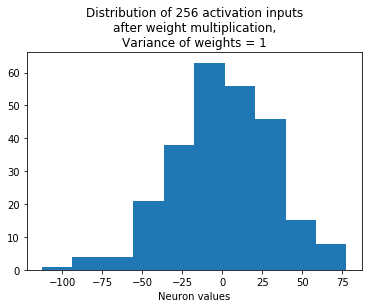

In [98]:
plt.hist(o1)
plt.title("Distribution of 256 activation inputs\nafter weight multiplication,\nVariance of weights = 1")
plt.xlabel("Neuron values");

(array([ 7.,  6., 24., 35., 63., 58., 35., 18.,  8.,  2.]),
 array([-0.16449056, -0.13034942, -0.09620829, -0.06206715, -0.02792602,
         0.00621511,  0.04035625,  0.07449738,  0.10863852,  0.14277965,
         0.17692078]),
 <a list of 10 Patch objects>)

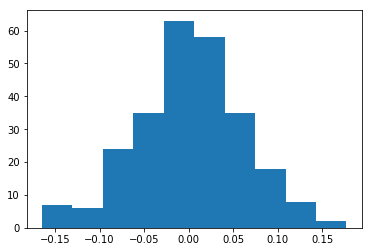

In [83]:
plt.hist(o2)

In [85]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

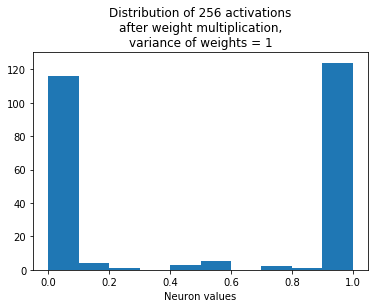

In [97]:
plt.hist(sigmoid(o1))
plt.title("Distribution of 256 activations\nafter weight multiplication,\nvariance of weights = 1")
plt.xlabel("Neuron values");

(array([ 7.,  7., 23., 35., 63., 57., 36., 18.,  8.,  2.]),
 array([0.45896983, 0.46748437, 0.4759989 , 0.48451344, 0.49302797,
        0.50154251, 0.51005704, 0.51857158, 0.52708611, 0.53560065,
        0.54411519]),
 <a list of 10 Patch objects>)

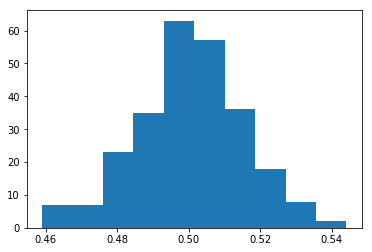

In [88]:
plt.hist(sigmoid(o2))

### Xavier init

In [43]:
mnist_soft = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid(),
                  weight_init="xavier")],
            loss = SoftmaxCrossEntropy(), 
seed=190119)

trainer = Trainer(mnist_soft, SGD(0.1))
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 5,
       eval_every = 1,
       seed=190119,
           batch_size=60,
           early_stopping=False);

calc_accuracy_model(mnist_soft, X_test)

Validation loss after 1 epochs is 23912.385
Validation loss after 2 epochs is 23912.385
Validation loss after 3 epochs is 23912.385
Validation loss after 4 epochs is 23912.385
Validation loss after 5 epochs is 23912.385
The model validation accuracy is: 89.06%


Loss almost identical with with bad init.

Compare to **learning rate of 0.01**.

In [ ]:
mnist_soft = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid(),
                  weight_init="xavier")],
            loss = SoftmaxCrossEntropyLoss(), 
seed=190119)

trainer = Trainer(mnist_soft, SGD(0.01))
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 5,
       eval_every = 1,
       seed=190119,
           batch_size=60,
           early_stopping=False);

np.equal(np.argmax(mnist_soft.forward(X_test), axis=1), y_test).sum() / 10000.0

In [ ]:
mnist_soft = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid(),
                  weight_init="xavier")],
            loss = SoftmaxCrossEntropyLossComplex(), 
seed=190119)

trainer = Trainer(mnist_soft, SGD(0.1))
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 5,
       eval_every = 1,
       seed=190119,
           batch_size=60,
           early_stopping=False);

np.equal(np.argmax(mnist_soft.forward(X_test), axis=1), y_test).sum() / 10000.0

### MSE Loss

In [ ]:
mnist_mse = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid())],
            loss = MeanSquaredError(),
seed=190119)

trainer = Trainer(mnist_mse, SGD(0.1))
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 5,
       eval_every = 1,
            batch_size=60,
       seed=190119,
           early_stopping=False);

np.equal(np.argmax(mnist_mse.forward(X_test), axis=1), y_test).sum() / 10000.0

In [ ]:
mnist_mse = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid())],
            loss = MeanSquaredError(),
seed=190119)

trainer = Trainer(mnist_mse, SGD(0.01))
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 5,
       eval_every = 1,
            batch_size=60,
       seed=190119,
           early_stopping=False);

np.equal(np.argmax(mnist_mse.forward(X_test), axis=1), y_test).sum() / 10000.0

## Momentum

In [62]:
from lincoln.numpy.optimizers import SGDMomentum, AdaGrad

In [22]:
mnist_soft = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid())],
            loss = SoftmaxCrossEntropy(),
seed=190119)

trainer = Trainer(mnist_soft, SGD(lr=0.1))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 10,
            eval_every = 2,
            seed=190119,
            batch_size=60,
            early_stopping=False);

calc_accuracy_model(mnist_soft, X_test)

Validation loss after 2 epochs is 23993.463
Validation loss after 4 epochs is 23872.960
Validation loss after 6 epochs is 23810.145
Validation loss after 8 epochs is 23782.361
Validation loss after 10 epochs is 23776.518
The model validation accuracy is: 90.60%


In [23]:
mnist_soft = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid())],
            loss = SoftmaxCrossEntropy(),
seed=190119)

trainer = Trainer(mnist_soft, SGDMomentum(lr=0.1, momentum=0.5))
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 10,
       eval_every = 2,
       seed=190119,
            batch_size=60);

calc_accuracy_model(mnist_soft, X_test)

Validation loss after 2 epochs is 24062.761
Validation loss after 4 epochs is 23871.167
Validation loss after 6 epochs is 23834.888
Validation loss after 8 epochs is 23765.475
Loss increased after epoch 10, final loss was 23765.475, using model from epoch 8
The model validation accuracy is: 90.62%


In [27]:
mnist_soft = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid())],
            loss = SoftmaxCrossEntropy(),
seed=190119)

trainer = Trainer(mnist_soft, SGD(lr=0.01))
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 50,
       eval_every = 10,
       seed=190119,
            batch_size=60,
           early_stopping=False);

calc_accuracy_model(mnist_soft, X_test)

Validation loss after 10 epochs is 24083.153
Validation loss after 20 epochs is 23921.454
Validation loss after 30 epochs is 23865.834
Validation loss after 40 epochs is 23827.354
Validation loss after 50 epochs is 23808.390
The model validation accuracy is: 90.34%


In [26]:
mnist_soft = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid())],
            loss = SoftmaxCrossEntropy(),
seed=190119)

trainer = Trainer(mnist_soft, SGDMomentum(lr=0.01, momentum=0.5))
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 50,
       eval_every = 10,
       seed=190119,
            batch_size=60,
           early_stopping=False);

calc_accuracy_model(mnist_soft, X_test)

Validation loss after 10 epochs is 23920.081
Validation loss after 20 epochs is 23812.222
Validation loss after 30 epochs is 23782.665
Validation loss after 40 epochs is 23760.314
Validation loss after 50 epochs is 23743.141
The model validation accuracy is: 90.81%


Conclusion: `SGDMomentum` works!

In [ ]:
mnist_soft = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid(),
                  weight_init="xavier")],
            loss = SoftmaxCrossEntropyLoss(),
seed=190119)

trainer = Trainer(mnist_soft, SGDMomentum(lr=0.1, momentum=0.75))
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 10,
       eval_every = 2,
       seed=190119,
            batch_size=60,
           early_stopping=False);

np.equal(np.argmax(mnist_soft.forward(X_test), axis=1), y_test).sum() / 10000.0

Conclusion: momentum of 0.75 too high!

In [ ]:
mnist_soft = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid(),
                  weight_init="xavier")],
            loss = SoftmaxCrossEntropyLoss(),
seed=190119)

trainer = Trainer(mnist_soft, SGDMomentum(lr=0.01, momentum=0.5))
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 10,
       eval_every = 2,
       seed=190119,
            batch_size=60,
           early_stopping=False);

np.equal(np.argmax(mnist_soft.forward(X_test), axis=1), y_test).sum() / 10000.0

Lowest for logistic regression! 

In [ ]:
mnist_soft = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid(),
                  weight_init="xavier")],
            loss = SoftmaxCrossEntropyLossComplex(),
seed=190119)

trainer = Trainer(mnist_soft, SGDMomentum(lr=0.01, momentum=0.5))
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 10,
       eval_every = 2,
       seed=190119,
            batch_size=60,
           early_stopping=False);

np.equal(np.argmax(mnist_soft.forward(X_test), axis=1), y_test).sum() / 10000.0

In [ ]:
mnist_soft = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid(),
                  weight_init="xavier")],
            loss = SoftmaxCrossEntropyLossComplex(),
seed=190119)

trainer = Trainer(mnist_soft, SGDMomentum(lr=0.01, momentum=0.5))
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 10,
       eval_every = 2,
       seed=190119,
            batch_size=60,
           early_stopping=False);

np.equal(np.argmax(mnist_soft.forward(X_test), axis=1), y_test).sum() / 10000.0

In [31]:
mnist_soft = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid())],
            loss = SoftmaxCrossEntropy(),
seed=190119)

trainer = Trainer(mnist_soft, AdaGrad(lr=1))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 50,
            eval_every = 10,
            seed=190119,
            batch_size=60,
            early_stopping=False);


Validation loss after 10 epochs is 28078.554
Validation loss after 20 epochs is 28037.520
Validation loss after 30 epochs is 28023.541
Validation loss after 40 epochs is 28020.568
Validation loss after 50 epochs is 28025.753


In [33]:
mnist_soft = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid(),
                 weight_init="xavier")],
            loss = SoftmaxCrossEntropy(),
seed=190119)

trainer = Trainer(mnist_soft, AdaGrad(lr=1))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 50,
            eval_every = 10,
            seed=190119,
            batch_size=60,
            early_stopping=False);



Validation loss after 10 epochs is 24888.084
Validation loss after 20 epochs is 24774.273
Validation loss after 30 epochs is 24752.941
Validation loss after 40 epochs is 24760.535
Validation loss after 50 epochs is 24743.789


In [34]:
calc_accuracy_model(mnist_soft, X_test)

The model validation accuracy is: 80.36%


In [35]:
mnist_soft = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid(),
                 weight_init="xavier")],
            loss = SoftmaxCrossEntropy(),
seed=190119)

trainer = Trainer(mnist_soft, AdaGrad(lr=0.1))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 50,
            eval_every = 10,
            seed=190119,
            batch_size=60,
            early_stopping=False);


calc_accuracy_model(mnist_soft, X_test)

Validation loss after 10 epochs is 24742.612
Validation loss after 20 epochs is 24724.655
Validation loss after 30 epochs is 24720.798
Validation loss after 40 epochs is 24720.431
Validation loss after 50 epochs is 24719.756
The model validation accuracy is: 80.65%


In [ ]:
np.equal(np.argmax(mnist_soft.forward(X_test), axis=1), y_test).sum() / 10000.0

## Weight decay

#### Exponential decay

In [56]:
mnist_soft = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid(),
                 weight_init="xavier")],
            loss = SoftmaxCrossEntropy(),
seed=190119)

trainer = Trainer(mnist_soft, SGD(lr=0.1, exp_decay=0.9))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 10,
            eval_every = 2,
            seed=190119,
            batch_size=60,
            early_stopping=False);


calc_accuracy_model(mnist_soft, X_test)

Validation loss after 2 epochs is 23879.955
Validation loss after 4 epochs is 23771.361
Validation loss after 6 epochs is 23707.017
Validation loss after 8 epochs is 23678.279
Validation loss after 10 epochs is 23680.193
The model validation accuracy is: 90.85%


#### Linear decay

In [58]:
mnist_soft = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid(),
                 weight_init="xavier")],
            loss = SoftmaxCrossEntropy(),
seed=190119)

trainer = Trainer(mnist_soft, SGD(lr=0.1, final_lr_linear=0.01))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 10,
            eval_every = 2,
            seed=190119,
            batch_size=60,
            early_stopping=False);


calc_accuracy_model(mnist_soft, X_test)

Validation loss after 2 epochs is 23800.268
Validation loss after 4 epochs is 23693.795
Validation loss after 6 epochs is 23673.747
Validation loss after 8 epochs is 23664.769
Validation loss after 10 epochs is 23670.175
The model validation accuracy is: 90.85%


In [64]:
mnist_soft = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid(),
                 weight_init="xavier")],
            loss = SoftmaxCrossEntropy(),
seed=190119)

trainer = Trainer(mnist_soft, SGDMomentum(lr=0.1, 
                                          momentum=0.5,
                                          final_lr_linear=0.01))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 10,
            eval_every = 2,
            seed=190119,
            batch_size=60,
            early_stopping=False);


calc_accuracy_model(mnist_soft, X_test)

Validation loss after 2 epochs is 23838.274
Validation loss after 4 epochs is 23749.957
Validation loss after 6 epochs is 23704.080
Validation loss after 8 epochs is 23690.513
Validation loss after 10 epochs is 23691.833
The model validation accuracy is: 90.95%


### Dropout

In [65]:
mnist_soft = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid(),
                 weight_init="xavier",
                 dropout=0.9)],
            loss = SoftmaxCrossEntropy(),
seed=190119)

trainer = Trainer(mnist_soft, SGDMomentum(lr=0.1, 
                                          momentum=0.5,
                                          final_lr_linear=0.01))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 10,
            eval_every = 2,
            seed=190119,
            batch_size=60,
            early_stopping=False);


calc_accuracy_model(mnist_soft, X_test)

Validation loss after 2 epochs is 25689.932
Validation loss after 4 epochs is 25617.219
Validation loss after 6 epochs is 25561.961
Validation loss after 8 epochs is 25563.718
Validation loss after 10 epochs is 25539.547
The model validation accuracy is: 73.35%


In [66]:
mnist_soft = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid(),
                 weight_init="xavier",
                 dropout=0.1)],
            loss = SoftmaxCrossEntropy(),
seed=190119)

trainer = Trainer(mnist_soft, SGDMomentum(lr=0.1, 
                                          momentum=0.5,
                                          final_lr_linear=0.01))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 10,
            eval_every = 2,
            seed=190119,
            batch_size=60,
            early_stopping=False);


calc_accuracy_model(mnist_soft, X_test)

Validation loss after 2 epochs is 31757.353
Validation loss after 4 epochs is 31738.945
Validation loss after 6 epochs is 31728.442
Validation loss after 8 epochs is 31725.641
Validation loss after 10 epochs is 31726.017
The model validation accuracy is: 12.75%


# Neural Networks

In [67]:
np.min(X_train), np.max(X_train), np.min(X_test), np.max(X_test)

(-0.424073894391566, 2.821543345689335, -0.424073894391566, 2.821543345689335)

#### SGD LR = 1

In [72]:
mnist_soft_nn = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh()),
            Dense(neurons=10, 
                  activation=Sigmoid())],
            loss = SoftmaxCrossEntropy(), 
seed=190119)

trainer = Trainer(mnist_soft_nn, SGD(1))
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 10,
       eval_every = 1,
       seed=190119,
            batch_size=60);

np.equal(np.argmax(mnist_soft_nn.forward(X_test), axis=1), y_test).sum() / 10000.0

Validation loss after 1 epochs is 25379.959
Loss increased after epoch 2, final loss was 25379.959, using model from epoch 1


0.729

Conclusion: bad.

LR = 0.1

In [77]:
mnist_soft_nn = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh()),
            Dense(neurons=10, 
                  activation=Sigmoid())],
            loss = SoftmaxCrossEntropy(), 
seed=190119)

trainer = Trainer(mnist_soft_nn, SGD(0.1))
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 5,
       eval_every = 1,
       seed=190119,
            batch_size=60);

calc_accuracy_model(mnist_soft_nn, X_test)

Validation loss after 1 epochs is 24144.350
Validation loss after 2 epochs is 23808.220
Validation loss after 3 epochs is 23663.812
Validation loss after 4 epochs is 23567.897
Validation loss after 5 epochs is 23498.870
The model validation accuracy is: 92.34%


In [ ]:
# mnist_soft_nn = NeuralNetwork(
#     layers=[Dense(neurons=256, 
#                   activation=Tanh()),
#             Dense(neurons=10, 
#                   activation=Sigmoid())],
#             loss = SoftmaxCrossEntropyLossComplex(), 
# seed=190119)

# trainer = Trainer(mnist_soft_nn, SGD(0.1))
# trainer.fit(X_train, train_labels, X_test, test_labels,
#        epochs = 5,
#        eval_every = 1,
#        seed=190119,
#             batch_size=60);

# np.equal(np.argmax(mnist_soft_nn.forward(X_test), axis=1), y_test).sum() / 10000.0

#### SGD LR = 0.1, Glorot init

In [78]:
mnist_soft_nn = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh(),
                 weight_init="glorot"),
            Dense(neurons=10, 
                  activation=Sigmoid(),
                  weight_init="glorot")],
            loss = SoftmaxCrossEntropy(), 
seed=190119)

trainer = Trainer(mnist_soft_nn, SGD(0.1))
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 5,
       eval_every = 1,
       seed=190119,
            batch_size=60);

calc_accuracy_model(mnist_soft_nn, X_test)

Validation loss after 1 epochs is 23796.343
Validation loss after 2 epochs is 23609.039
Validation loss after 3 epochs is 23444.673
Validation loss after 4 epochs is 23394.079
Loss increased after epoch 5, final loss was 23394.079, using model from epoch 4
The model validation accuracy is: 93.13%


#### SGD LR = 0.1, Momentum = 0.5

In [ ]:
mnist_soft_nn = NeuralNetwork(
    layers=[Dense(neurons=256, 
                  activation=Tanh(),
                  weight_init="xavier"),
            Dense(neurons=10, 
                  activation=Sigmoid(),
                  weight_init="xavier")],
            loss = SoftmaxCrossEntropyLoss(), 
seed=190119)

trainer = Trainer(mnist_soft_nn, SGDMomentum(lr=0.1, momentum=0.5))
trainer.fit(X_train, train_labels, X_test, test_labels,
       epochs = 10,
       eval_every = 1,
       seed=190119,
            batch_size=60,
           early_stopping=False);

np.equal(np.argmax(mnist_soft_nn.forward(X_test), axis=1), y_test).sum() / 10000.0

## Appendix

## Logistic regression, wrong learning rate

In [ ]:
mnist_soft = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid())],
            loss = SoftmaxCrossEntropy(), 
seed=190119)

trainer = Trainer(mnist_soft, SGD(1))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 10,
            eval_every = 2,
            seed=190119,
            batch_size=60);

calc_accuracy_model(mnist_soft, X_test)

In [ ]:
mnist_soft = NeuralNetwork(
    layers=[Dense(neurons=10, 
                  activation=Sigmoid())],
            loss = SoftmaxCrossEntropy(), 
seed=190119)

trainer = Trainer(mnist_soft, SGD(0.01))
trainer.fit(X_train, train_labels, X_test, test_labels,
            epochs = 10,
            eval_every = 2,
            seed=190119,
            batch_size=60);

calc_accuracy_model(mnist_soft, X_test)